In [1]:
from src.plot_raw_data import list_of_filenames, load_raw_data
from src.filter_raw_data import remove_first_cath_branch
from src.get_selected_features import get_ocps
import matplotlib.pyplot as plt
# get Times New Roman font for matlotlib plots
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
import os
import numpy as np
%matplotlib widget

In [3]:
print(0%2)
print(1%2)
print(2%2)
print(3%2)

0
1
0
1


In [ ]:
dict = {}
if not dict:
    print(None)

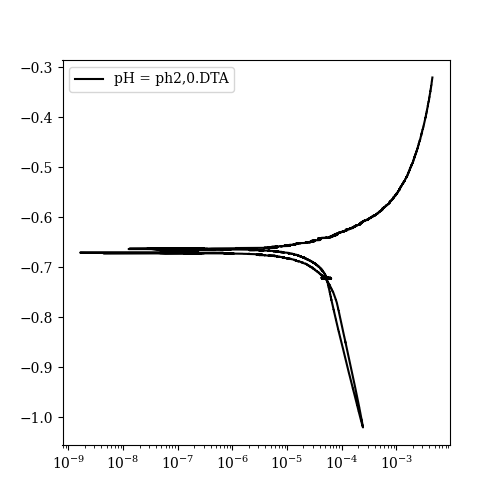

In [2]:
plt.figure(figsize=(5, 5))

folder = "raw_data_without_gamry_noise"

files = list_of_filenames(folder)
idx=0
file_path: str = os.path.join(folder, files[idx])
potential_raw, current_density = load_raw_data(file_path)
plt.semilogx(abs(current_density), potential_raw, color="k", label=f"pH = {files[idx]}")
plt.legend()


In [16]:
# def _list_files() -> list:
#     return list_of_filenames()

# def _empty_dict() -> dict:
#     return {}

In [29]:
# def get_i_corr(ocp_t_half, tafel_slope: "V/dec", E0, i0) -> float:
#     # y = ax + b, E = tafel_slope * np.log(abs(i)) + b 
#     # returns abs(i)
#     # b = y - ax
#     b = E0 - tafel_slope* np.log10(abs(i0))
#     i_corr = 10**((ocp_t_half - b) / tafel_slope)
#     return i_corr

# def round_i_corr(i_corr:float) -> float:
#     ranges = [ (1e-9, 1e8), (1e-8, 1e7), (1e-7, 1e6), (1e-6, 1e-5) ]
#     for range_min, scale_factor in ranges:
#         if i_corr > range_min and i_corr < scale_factor * range_min:
#             i_corr_rounded = round(i_corr / range_min, 1) * range_min
#             break
#         else:
#             i_corr_rounded = i_corr
#     return i_corr_rounded


# def create_data_for_plots_with_tafel_and_ocp(file_index, folder: str = "raw_data") -> list[float | str]:
#     list_files = _list_files()
#     file = list_files[file_index]
#     file_path = os.path.join(folder, file)
#     potential, current_density = load_raw_data(file_path)
#     i, E = remove_first_cath_branch(current_density, potential)
#     _, ocp_t_half, _ = _get_ocps(potential, E, i)
#     pH = [file[2:5] if file[4] != "," else file[2:6]][0]

#     treshold = 0.15
#     # remove all potentials that are above ocp and below a treshold defined as 0.2 lower than ocp
#     mask = (E > (ocp_t_half - treshold)) & (E <= ocp_t_half+treshold)
#     E, i = E[mask], i[mask]
#     index_sort = np.argsort(E)[::-1]
#     E, i = E[index_sort], i[index_sort]
#     return [E, i, ocp_t_half, pH]

# def slope(E0: float, E1: float, i0: float, i1: float) -> float:
#     return (E1-E0) / (np.log10(abs(i1)) - np.log10(abs(i0)))

# def plot_figure(E: np.ndarray, i: np.ndarray, label: str, E0: float, E1: float, i0: float, i1: float, ocp_t_half: float) -> None:
#     plt.figure(figsize=(8,8))
#     plt.xlabel("|i| [A/cm$^2$]")
#     plt.ylabel("E [V]")
    
#     plt.semilogx(abs(i), E, label = f"pH = {label}")
#     tafel_slope = round(slope(E0, E1, i0, i1) * 1000)  # mv/dec
#     i_corr = get_i_corr(ocp_t_half, tafel_slope/1000, E0, i0)
#     i_corr_rounded = round_i_corr(i_corr)
#     # plot tafel
#     plt.semilogx((i_corr, abs(i1)), (ocp_t_half, E1), label = f"Tafel, $b_{{\mathrm{{c}}}}$ = {tafel_slope} mV/dec, $i_{{\mathrm{{corr}}}}$ = {i_corr_rounded}", linestyle = "dashed", color = "k")
    
#     plt.axhline(ocp_t_half, linestyle="dashed", color = "r", label = f"OCP = {ocp_t_half} V")
#     plt.legend()
#     plt.savefig(f"figures_tafel_slopes/{label}.png")
    
#     # store pH and tafel
#     empty_dict_tafel_slopes = _empty_dict()
#     i_corr_dict = _empty_dict()
    
#     empty_dict_tafel_slopes[label] = tafel_slope # mV/dec
#     i_corr_dict[label] = i_corr_rounded
    



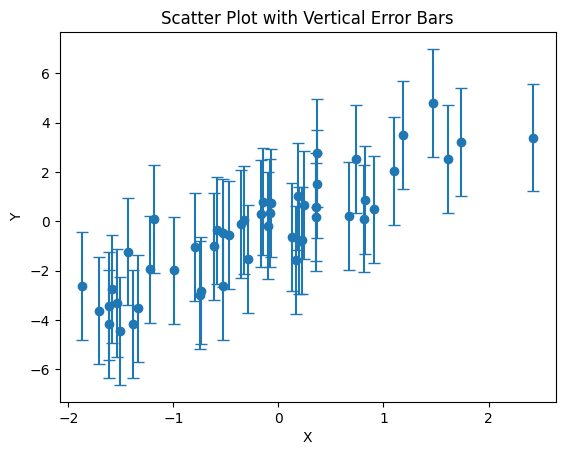

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.normal(size=50)
y = 2 * x + np.random.normal(size=50)

# Calculate the error bars (for example, using standard deviation)
yerr = np.std(y) * np.ones_like(y)

# Create the scatter plot with error bars
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=4)

# Add axis labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot with Vertical Error Bars')

# Show the plot
plt.show()


In [30]:
# manually check each curve to find tafel slopes
# on form E0, E1, i0, i1

# def add_values_manually_for_tafel_line() -> dict:
#     _dict = _empty_dict()
#     _dict["idx0"] = {"E0": -0.687, "E1": -0.695,  "i0": 6.27*10**-8, "i1":1.69*10**-7}
#     _dict["idx1"] = {"E0": -0.778, "E1": -0.784,  "i0": 3.51*10**-8, "i1":7.89*10**-8}

#     return _dict

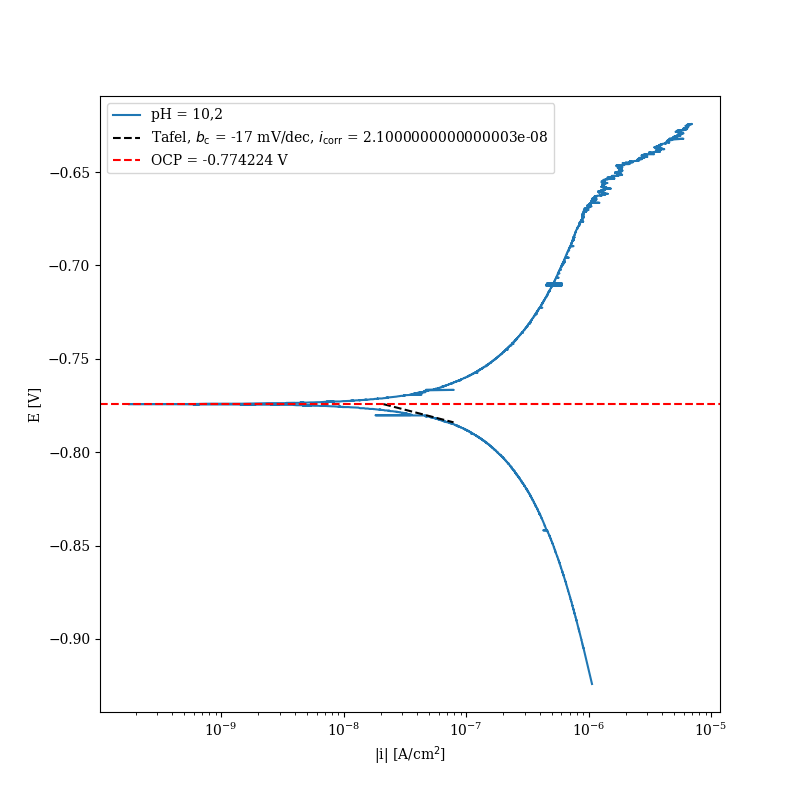

In [31]:
# if __name__ == "__main__":
#    index_to_study = 1
#    list_files = _list_files()

#    for idx in range(len(list_files)):
#       if idx == index_to_study:
#          E, i, ocp_t_half, pH = create_data_for_plots_with_tafel_and_ocp(idx) 
#          idx_string = f"idx{idx}"
#          _dict = add_values_manually_for_tafel_line()[idx_string]
#          plot_figure(E, i, label = pH, **_dict, ocp_t_half=ocp_t_half)

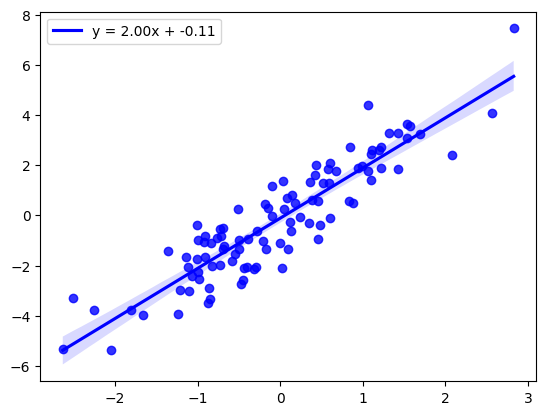

In [7]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for demonstration purposes
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

# Perform a linear regression and get the slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Use seaborn's regplot to plot the data and regression line with confidence interval band
sns.regplot(x=x, y=y, color='blue', line_kws={'label': f'y = {slope:.2f}x + {intercept:.2f}'}, ci=95)
plt.legend()
plt.show()


In [23]:
from scipy import stats
import numpy as np

x = np.arange(0, 10)
y = 2 * x**2

result = stats.linregress(x, y)[0]

slope, intercept, rvalue, pvalue, std_error_slope, intercept_stderr = result.slope, result.intercept, result.rvalue, result.pvalue, result.stderr, result.intercept_stderr






9.549869109050672


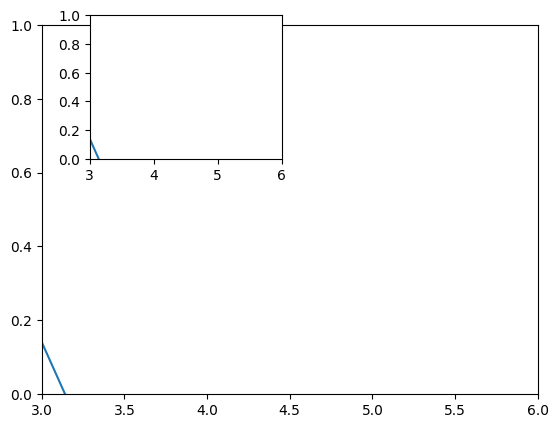

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the data on the axes object
ax.plot(x, y)

# Zoom in on the part of the plot that you want to see in more detail
ax.set_xlim(3, 6)
ax.set_ylim(0, 1)

# Create a new axes object in the desired location
ax_zoom = fig.add_axes([0.2, 0.6, 0.3, 0.3])

# Plot the zoomed-in data on the new axes object
ax_zoom.plot(x, y)
ax_zoom.set_xlim(3, 6)
ax_zoom.set_ylim(0, 1)

# Show the plot
plt.show()


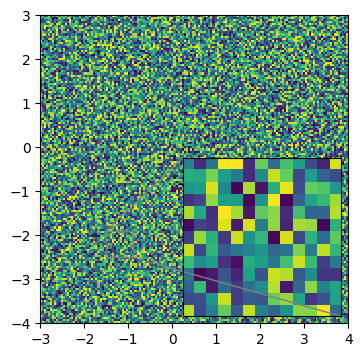

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import numpy as np

fig, ax = plt.subplots(figsize=[5, 4])

# Prepare the demo image
Z = np.random.rand(150, 150)
extent = (-3, 4, -4, 3)

ax.imshow(Z, extent=extent, interpolation="nearest", origin="lower")

# Zoomed-in axes
axins = zoomed_inset_axes(ax, 6, loc='lower right')
axins.imshow(Z, extent=extent, interpolation="nearest", origin="lower")
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

# Draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# Show the plot
plt.show()


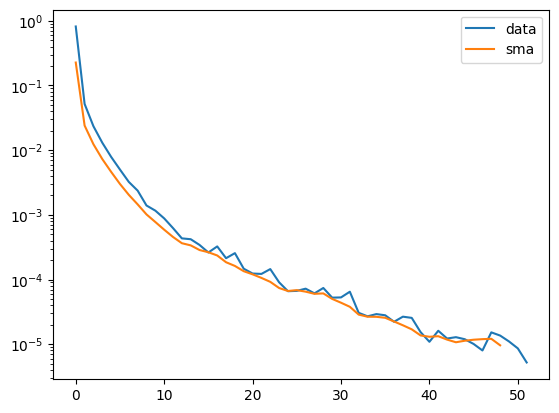

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# create a numpy array with the data
data = np.array([8.17330090e-01, 5.18010698e-02, 2.34161459e-02, 1.30338496e-02,
                 7.87206014e-03, 5.01305953e-03, 3.22774475e-03, 2.36713465e-03,
                 1.39447518e-03, 1.16068086e-03, 8.81251640e-04, 6.23639130e-04,
                 4.32569310e-04, 4.19765930e-04, 3.42443790e-04, 2.61707090e-04,
                 3.24815240e-04, 2.13587520e-04, 2.55669770e-04, 1.46860660e-04,
                 1.23717000e-04, 1.22030610e-04, 1.44914500e-04, 9.05224600e-05,
                 6.59247000e-05, 6.67332300e-05, 7.21676600e-05, 6.10587800e-05,
                 7.39597200e-05, 5.24337000e-05, 5.28585600e-05, 6.47542600e-05,
                 3.05256200e-05, 2.69669400e-05, 2.91912900e-05, 2.79922800e-05,
                 2.22113700e-05, 2.66330700e-05, 2.55128300e-05, 1.53737500e-05,
                 1.08861700e-05, 1.61222600e-05, 1.22373200e-05, 1.28345500e-05,
                 1.19310000e-05, 1.00739800e-05, 7.99481000e-06, 1.52348200e-05,
                 1.35890600e-05, 1.10218500e-05, 8.60923000e-06, 5.21388000e-06])

# calculate the simple moving average with window length of 3
sma = np.convolve(data, np.ones(4)/4, mode='valid')

# plot the data points and the simple moving average in log scale
plt.semilogy(data, label='data')
plt.semilogy(sma, label='sma')
plt.legend()
plt.show()


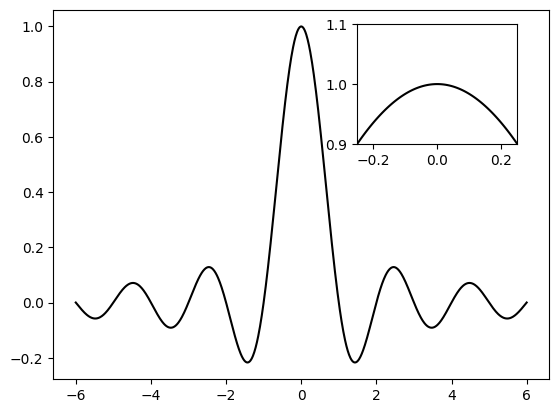

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Generate the main data
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

# Generate data for the zoomed portion
X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

# plot the main figure
fig, ax = plt.subplots()
ax.plot(X, Y, c='k')

# plot the zoomed portion with markers
zoom_scale = 0.2
zoom_width = 0.5
zoom_height = zoom_width * zoom_scale
sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot(X_detail, Y_detail, c='k')
#sub_axes.plot(X_detail, Y_detail, marker='o', markevery=50, markersize=4, markerfacecolor='r', markeredgewidth=0.5, markeredgecolor='k')
sub_axes.set_xlim([-zoom_width/2, zoom_width/2])
sub_axes.set_ylim([1-zoom_height, 1+zoom_height])

plt.show()
